We have Exploratory Data Set of Student Performance from different cities.

After that I am going to check the Average percentage of marks for each cities to know which cities is doing good or bad.



for this approach I am assinging the name of city as a key of the dictionary and then marks of the students as a value of the dictionary. 
Then using for loop I will find out the sum of each city marks and divide by their lenght of list it will give us mean of the data set.
After this i am going to create the new dictionary the assigning the mean of the marks of the student to the city i.e our key of dictionary respectively.

After that  I am going to check the data set have outliers or less outliers for this I will use kurtosis from my predefined function.
Then performing some visual for the better uderstanding to prove the hypothesis.




Kurtoses of the total marks is 2.456054531408174


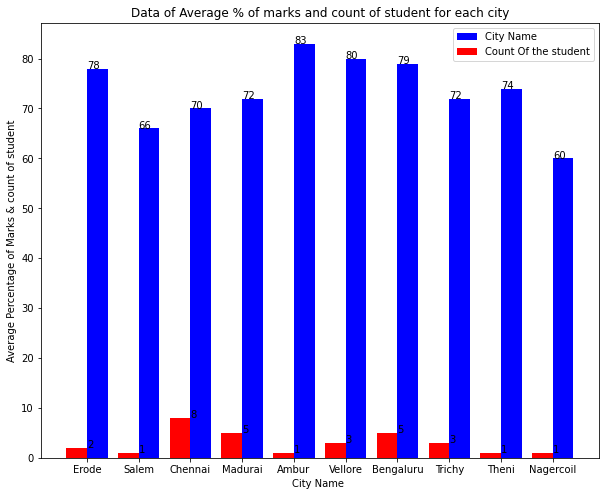

73.4


In [1]:

import numpy as np
from mean_median_mode_variance_range import  *  #My Predefined library
import csv#Importing csv library to read the data
from kurtoses import kurt  #My Predefined library
  
import matplotlib.pyplot as plt   #importing matplotlib

with open ("D:\data science\score_mini project.csv","r") as f:
    csv_reader=csv.DictReader(f)

    #converting dictionary into list for proper indexing and to perform operation
    name_reader=list(csv_reader)

#Now I have created new dictionary of key city and their marks of the students.
city_Total_marks={}
for i in name_reader:
    city_Total_marks[i["CityTown"]]=city_Total_marks.get(i["CityTown"],[])+[i["Total"]]

#Now I am going to findout the mean of the marks of each cities
mean_marks_city={}
#Now I am going to find the mean of the total marks for each city uising for loop
student_count=[] #count of student city wise 
for key, value in city_Total_marks.items():
    sum_marks=0  #Total Sum of marks for individual city
    for i in value:
        sum_marks+=int(i)
    student_count.append(len(value))   
    mean_marks_city[key]=int((sum_marks/len(value)/300)*100)#Percentage of the mean 

#Now extracting the keys "City Name" and Value " Percentage of mean " from the mean_marks_city dict.clear
city_marks=list(map(int,mean_marks_city.values()))
city_name=mean_marks_city.keys()
# I am importing my predefined fuction for measuring the kurtoses

result_totalmarks=kurt(city_marks)
print(f'Kurtoses of the total marks is {result_totalmarks}')
#Now we are plotting bar graph we are going to use matplot lib
x_axis=np.arange(len(student_count))
fig=plt.figure(figsize=(10,8))
plt.bar(x_axis +0.2,city_marks,width=0.4,color="Blue",label="City Name")
#for putting the data on bar graph  i am using for loop 
for index,value in enumerate(city_marks):
    plt.text(index,value,str(value))
plt.bar(x_axis -0.2,student_count,width=0.4,color="Red",label="Count Of the student")
for index,value in enumerate(student_count):
    plt.text(index,value,str(value))
plt.xticks(x_axis,city_name)
plt.legend()
plt.title("Data of Average % of marks and count of student for each city")
plt.xlabel("City Name ")
plt.ylabel("Average Percentage of Marks & count of student")
plt.show()

#Now I am checking the mean of the total marks and check which city perform near across mean 
mean_total_city=mean_meadian_mode(city_marks,"mean")

print(mean_total_city)


from the above data we can see that we got result that Ambuir city has performed well overall among all the cities and have less number of students. But when we look the data of chennai city we see that it has performed not well as compare to the others and having maximum number of students in it. And i have also check that their id very low or no any outlier present in that data of total marks because it is plattykurtic


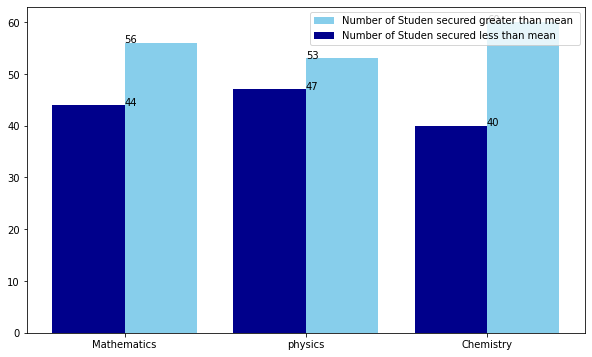

Kurtoses of Maths data is 2.429466312627962
Kurtoses of Maths data is 2.1954482234519856
Kurtoses of Maths data is 2.574392018504187
Mean of the maths marks is : 72.36666666666666
Mean of the physicsmarks is : 72.96666666666667
Mean of the Chemistry marks is : 77.13333333333334


In [2]:



subject_marks={}
for i in name_reader:
    subject_marks[i["Name"]]=subject_marks.get(i["Name"],[])+[i["Mathematics"]]+[i["Physics"]]+[i["Chemistry"]]


#Now extracing the each subject marks using for loop

maths=[] #To store the data of maths marks similarly below i have created 
physics=[]
chem=[]
for key,value in subject_marks.items():
    #Creatig loop to extarct the marks of each subject from the dictinary and store it individually
    for i in range(1):
        maths.append(value[0])
        physics.append(value[1])
        chem.append(value[2])


#now I am going to find the mean for each subject and check how many students are getting more marks than mean 
mean_mathematics=mean_meadian_mode((list(map(int,maths))),"mean")
mean_physics=mean_meadian_mode((list(map(int,physics))),"mean")
mean_chemistry=mean_meadian_mode((list(map(int,chem))),"mean")
#I have created a lambda function using filter to ount how many student getting more than or eaqual to mean marks of the each subject
greater_than_mean_maths=int(((len(list(filter(lambda x: x>=int(mean_mathematics),list(map(int,maths))))))/30)*100)
student_count=100
less_than_mean_maths=student_count-greater_than_mean_maths
greater_than_mean_physics=int(((len(list(filter(lambda x: x>=int(mean_physics),list(map(int,physics))))))/30)*100)
less_than_mean_physics=student_count-greater_than_mean_physics
greater_than_mean_chem=int(((len(list(filter(lambda x: x>= int(mean_chemistry),list(map(int,chem))))))/30)*100)
less_than_mean_chem=student_count-greater_than_mean_chem
subject_name=["Mathematics","physics","Chemistry"]
Grt_mean=[greater_than_mean_maths,greater_than_mean_physics,greater_than_mean_chem]
less_mean=[less_than_mean_maths,less_than_mean_physics,less_than_mean_chem]
x_axis=np.arange(len(subject_name))

#Ploting the bar graph

fig=plt.figure(figsize=(10,6))
plt.bar(x_axis +0.2,Grt_mean,label="Number of Studen secured greater than mean ",color="SkyBlue",width=0.4)
for index,value in enumerate(Grt_mean):
    plt.text(index,value,str(value))
plt.bar(x_axis -0.2,less_mean,label="Number of Studen secured less than mean ",color="DarkBlue",width=0.4)
for index,value in enumerate(less_mean):
    plt.text(index,value,str(value))
plt.xticks(x_axis,subject_name)
plt.legend()

plt.show()

print(f"Kurtoses of Maths data is {kurt(list(map(int,maths)))}")
print(f"Kurtoses of Maths data is {kurt(list(map(int,physics)))}")
print(f"Kurtoses of Maths data is {kurt(list(map(int,chem)))}")

print(f"Mean of the maths marks is : {mean_mathematics}")
print(f"Mean of the physicsmarks is : {mean_physics}")
print(f"Mean of the Chemistry marks is : {mean_chemistry}")

From the above visual we can see that approx 53 % students has secured greater than or equal to avg marks of physics,approx 56 % students has secured greater than or equal to avg marks of Mathematics,approx 62 % students has secured greater than or equal to avg marks of Chemitry.
also I have check the kurtoses for each subject data . If any outlier present in any set of data it will give wrong statistical result or hamper our result.
So we can see that no outliers are present in it.

#Now Further I am going to check if a student score good in Physics is it neccessary that he/she will do same in ther subject . for this I am going to check the correlation between every subjects.

In [3]:
#I have imported my library to measure the correlation betweent two data set
from correlation_second_program import *
com_math_phy=test(list(map(int,maths)),list(map(int,physics)))
print(f"{com_math_phy}  roundoff= {int(com_math_phy)}")
com_p_c=test(list(map(int,chem)),list(map(int,physics)))
print(f"{com_p_c} roudoff= {int(com_p_c)}") 
com_math_c=test(list(map(int,chem)),list(map(int,maths)))
print(f"{com_math_c} roudoff= {int(com_math_c)}") 

Correlation is used to measure the strenght of the relations between two variable 

rxy = +1 Stongly direct relationship between two variable 

rxy= -1 Strongly indirect relationship between the two variables

rxy =0 or near to o it means it has minimal effect on change
0.400950900799944  roundoff= 0
-0.006451214170447719 roudoff= 0
0.33121640628204035 roudoff= 0


From the above cunclusion I get that each subject marks is dependent on itself, So niether direlty related to other subject nor indirectly.
Because I am getting the correlatin value is 0 of each result.


Now I am getting to knwo that topper name and the city of the topper and his marks that he secured. 

for this I am using for loop 

In [4]:

city_name=city_Total_marks.keys()
total_marks=city_Total_marks.values()
#now I am converting list of list string into a int list
total_new_marks=[]
for i in total_marks: 
    for j in i:
        total_new_marks.append(int(j))

maximum_num=max(total_new_marks)


#Checking which city topper is belongs to
for key,value in city_Total_marks.items():
    for i in value:
        if i==str(maximum_num):
            print(f"City that he/she belongs to {key} and total marks he secured is {maximum_num} ")
            

City that he/she belongs to Bengaluru and total marks he secured is 281 


From the conclusion i get  the city of the topper and thier marks 

Now I am plotting the scatter plot for the each subject marks  to know how many students lies in average and how many get more marks 

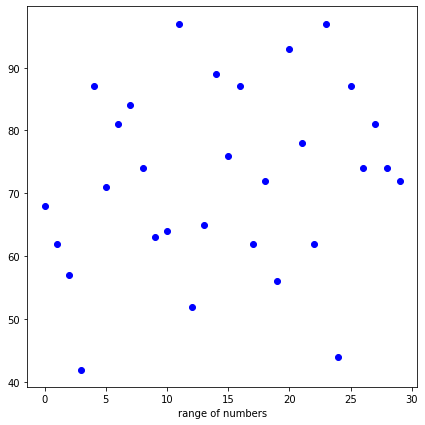

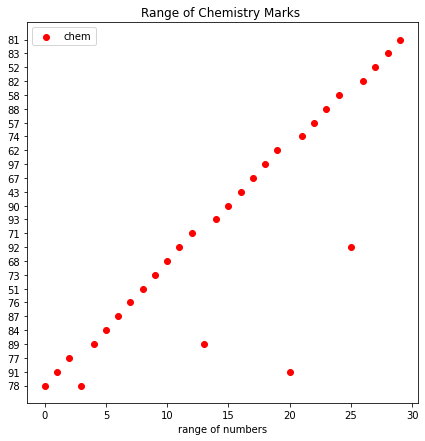

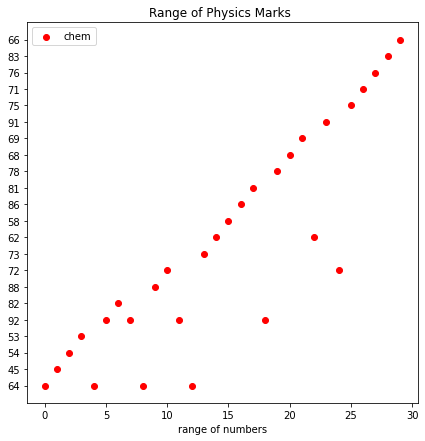

In [9]:



fig=plt.figure(figsize=(7,7))
subject_name=["Mathematics"]
maths=list(map(int,maths))
plt.scatter(range(0,30),maths,label="maths",color="blue")
plt.xlabel("range of numbers")
plt.show()
fig=plt.figure(figsize=(7,7))
plt.scatter(range(0,30),chem,label='chem',color='red')
plt.xlabel("range of numbers")
plt.title("Range of marks ")
plt.legend()
plt.title("Range of Chemistry Marks ")
plt.show()
fig=plt.figure(figsize=(7,7))
plt.scatter(range(0,30),physics,label='chem',color='red')
plt.xlabel("range of numbers")
plt.legend()
plt.title("Range of Physics Marks ")
plt.show()

In [6]:
From the above conclusion i get the visusl of the data 

SyntaxError: invalid syntax (554739655.py, line 1)